In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(20)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
282,5f32e525c437b75c58661c7c,2020-08-11 20:36:21.843,2020-08-11 18:36:21.835,YM SEP 20,SELL,2.0,27910.00,[0000e1a7.5f328806.01.01],97,233679417,STOP-LOSS,4.20,-608.40
283,5f32e536c437b75c58661c7d,2020-08-11 20:36:38.495,2020-08-11 18:36:38.489,MYM SEP 20,SELL,2.0,27901.00,[0000e1a7.5f328843.01.01],98,233679418,STOP-LOSS,0.94,-69.88
284,5f32eaf2c437b75c58661c96,2020-08-11 21:01:06.236,2020-08-11 19:01:06.166,MGCZ0,BUY,3.0,1934.50,"[0000e1a7.5f329052.01.01, 0000e1a7.5f329053.01...",130,1986171149,STOP-LOSS,1.41,411.18
285,5f32eaf3c437b75c58661c97,2020-08-11 21:01:07.230,2020-08-11 19:01:07.144,GCZ0,BUY,1.0,1934.50,[0000e1a7.5f329056.01.01],129,1986171148,STOP-LOSS,2.42,1305.16
286,5f32eeacc437b75c58661ca0,2020-08-11 21:17:00.933,2020-08-11 19:17:00.929,NQU0,SELL,1.0,10938.25,[0000e1a7.5f329840.01.01],131,1986171153,ENTRY,2.10,0.00
287,5f32eeb3c437b75c58661ca1,2020-08-11 21:17:07.310,2020-08-11 19:17:07.198,MNQU0,SELL,5.0,10940.40,"[0000e1a7.5f329843.01.01, 0000e1a7.5f329853.01...",132,1986171158,ENTRY,2.35,0.00
288,5f32f101c437b75c58661caa,2020-08-11 21:26:57.881,2020-08-11 19:26:57.825,NQU0,BUY,1.0,10939.75,[0000e1a7.5f329ea1.01.01],133,1986171155,STOP-LOSS,2.10,-34.20
289,5f32f101c437b75c58661cab,2020-08-11 21:26:57.885,2020-08-11 19:26:57.854,MNQU0,BUY,5.0,10939.75,"[0000e1a7.5f329ea2.01.01, 0000e1a7.5f329ea3.01...",134,1986171159,STOP-LOSS,2.35,1.80
290,5f32f3d5c437b75c58661cb4,2020-08-11 21:39:01.143,2020-08-11 19:39:01.125,NQU0,SELL,1.0,10905.25,[0000e1a7.5f32a3a7.01.01],135,1986171162,ENTRY,2.10,0.00
291,5f32f3dbc437b75c58661cb5,2020-08-11 21:39:07.523,2020-08-11 19:39:07.108,MNQU0,SELL,5.0,10902.80,"[0000e1a7.5f32a3aa.01.01, 0000e1a7.5f32a3ab.01...",136,1986171165,ENTRY,2.35,0.00


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [4]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-08-11 20:50:14.792,2020-08-11 22:50:14.794,GC,BUY,1.0,1925.5,142,STOP-LOSS,2.42,-894.84,131595.35
2020-08-12 01:45:01.637,2020-08-12 03:45:01.731,GC,SELL,1.0,1911.1,208,ENTRY,2.42,0.00,131595.35
2020-08-12 01:45:01.924,2020-08-12 03:45:01.927,GC,SELL,0.1,1911.1,209,ENTRY,0.47,0.00,131595.35
2020-08-12 02:27:43.704,2020-08-12 04:27:43.707,GC,BUY,0.1,1900.5,211,STOP-LOSS,0.47,105.06,131700.41
2020-08-12 02:27:43.780,2020-08-12 04:27:43.781,GC,BUY,1.0,1900.4,210,STOP-LOSS,2.42,1065.16,132765.57


In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])

In [6]:
allocs

NQ       0.25
GC       0.25
ES       0.25
YM       0.25
total    1.00
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES    -2714.930000
GC    11178.060001
NQ    10289.439999
YM     4619.000000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

23371.57

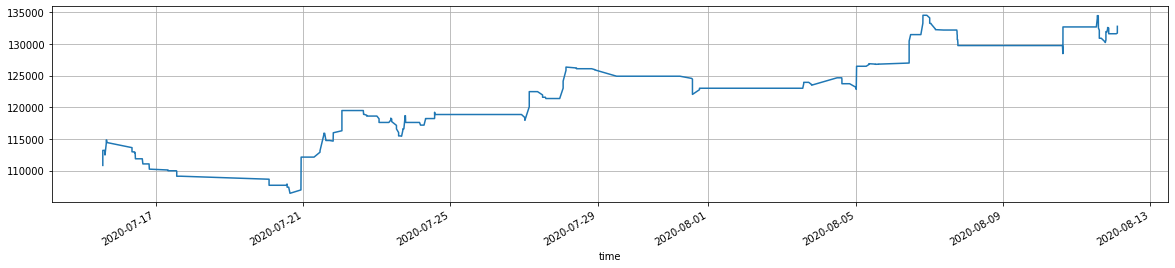

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     38
 GC     98
 NQ    136
 YM     30
 Name: action, dtype: int64,
 302)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.809524
 GC    4.666667
 NQ    6.476190
 YM    1.428571
 Name: action, dtype: float64,
 14.380952380952381)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES    102.67
GC    256.59
NQ    242.44
YM     82.58
Name: commission, dtype: float64

In [14]:
df.commission.sum()

684.28

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.38,348.08,1666.53,-442.99,3.76,358.63,16.5
NQ,0.40,220.32,1285.27,-480.99,2.67,225.51,44.4
ES,0.30,-112.16,1081.57,-623.76,1.73,-112.16,20.7
GC,0.41,275.45,1384.73,-489.57,2.83,278.89,42.1
total,0.39,207.87,1337.04,-500.86,2.67,215.92,123.7


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.110123,-0.368744,0.435916,0.392062
GC,0.110123,1.000000,0.035395,-0.085957,0.536192
NQ,-0.368744,0.035395,1.000000,0.173788,0.534659
YM,0.435916,-0.085957,0.173788,1.000000,0.641866
total,0.392062,0.536192,0.534659,0.641866,1.000000


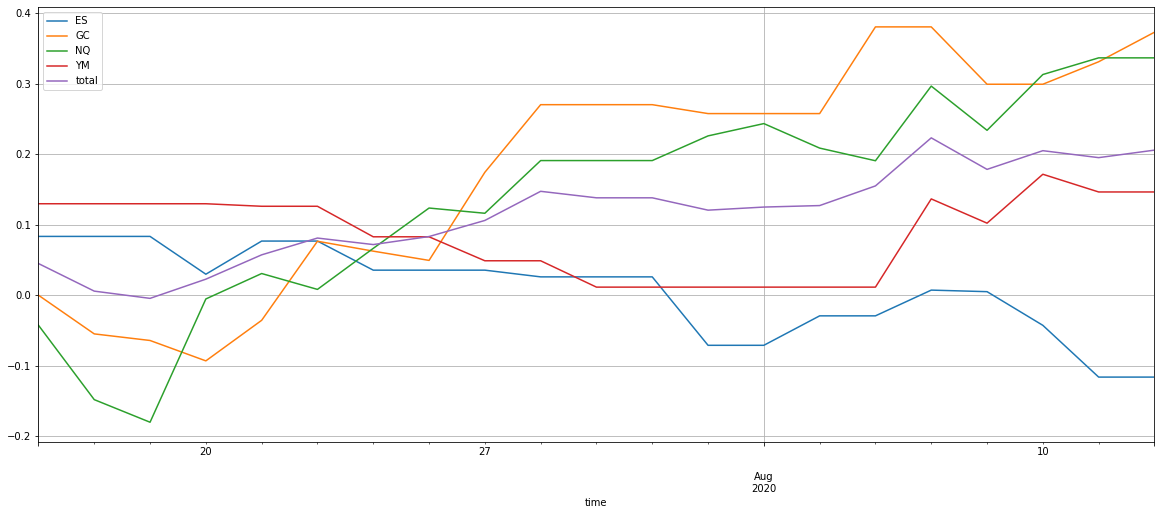

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

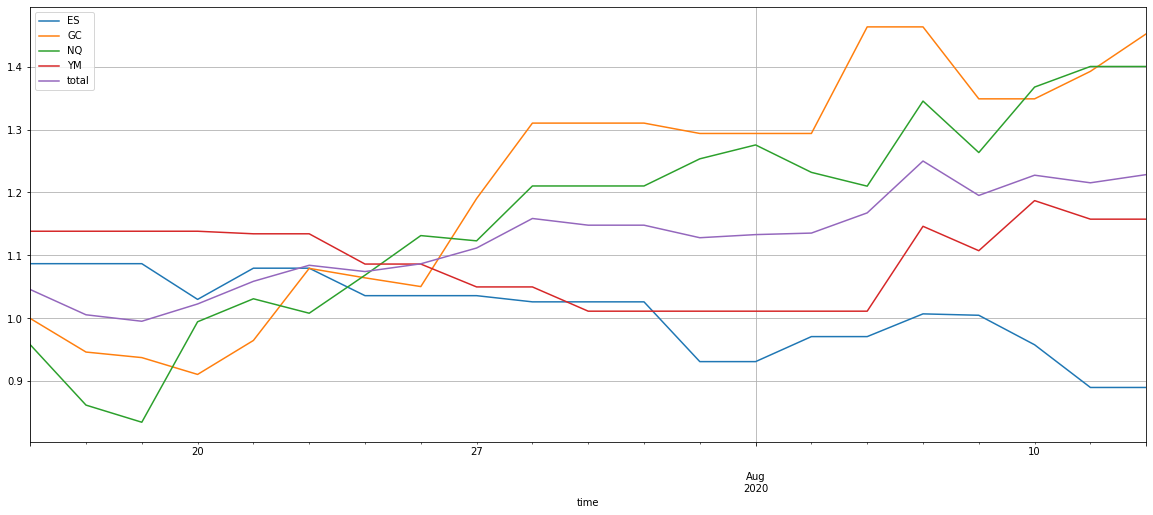

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.751830,86.802821,55.766818,4.793639,10.806066
Cumulative returns,-0.109647,0.451975,0.400150,0.157655,0.228406
Annual volatility,0.642836,0.924511,1.028400,0.767595,0.443719
Sharpe ratio,-1.853132,5.305206,4.428427,2.640362,5.800057
Calmar ratio,-4.156726,976.113363,338.276967,42.982809,224.181402
Stability,0.741736,0.847643,0.878212,0.008868,0.884696
Max drawdown,-0.180871,-0.088927,-0.164855,-0.111525,-0.048202
Omega ratio,0.684024,2.957183,2.202159,1.967018,2.555647
Sortino ratio,-2.420285,13.901825,9.669673,7.535341,11.666305
Skew,-0.070043,0.734128,0.727033,1.829317,0.019037


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-6.86,29.38,25.35,1.15,12.82
2020-08-31,-4.41,12.23,11.70,14.45,8.88


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -11.0
GC       45.0
NQ       40.0
YM       16.0
total    23.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-07-20 22:44:06.883,NQ,SELL,10934.00,5180.80
2020-08-06 10:49:16.287,YM,SELL,27017.00,3471.60
2020-07-22 01:17:38.552,GC,SELL,1860.40,3190.32
2020-08-05 00:35:18.941,GC,SELL,2036.30,2815.16
2020-07-21 13:30:08.703,GC,SELL,1837.40,2510.32
...,...,...,...,...
2020-07-21 14:49:07.463,GC,SELL,1837.50,-1029.68
2020-08-10 14:59:13.626,ES,SELL,3332.75,-1158.40
2020-08-11 14:42:33.795,GC,BUY,1962.80,-1264.84


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-08-06,0.037172,0.000000,0.111660,0.133267,0.070525
2020-07-15,0.086951,0.000000,-0.041694,0.138478,0.045934
2020-07-28,-0.009478,0.100648,0.077581,0.000000,0.042188
2020-07-21,0.048123,0.059194,0.036711,-0.003575,0.035113
2020-08-05,0.000000,0.130831,-0.017782,0.000000,0.028262
2020-07-20,-0.052202,-0.028497,0.191042,0.000000,0.027586
2020-08-10,-0.046631,0.000000,0.082316,0.071804,0.026872
2020-07-22,0.000000,0.118659,-0.022251,0.000000,0.024102
2020-07-27,0.000000,0.133071,-0.007373,-0.033426,0.023068
